<a href="https://colab.research.google.com/github/flyaflya/persuasive/blob/main/demoNotebooks/CreditCardModelWalkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install matplotlib numpyro daft --upgrade  ##restart runtime

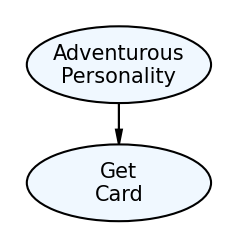

In [1]:
#@title The BankPass Story - Show Video Excerpt
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial, partialmethod
import daft   ### %pip install -U git+https://github.com/daft-dev/daft.git
from numpy.random import default_rng
import numpy as np

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, scale = 1.3, aspect = 2.4, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 5.4, fontsize = 9.25, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.3, aspect = 2.4, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.25, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.latNode("x","Get\n"+r"Card",1,1)
pgm.latNode("y","Adventurous\n"+r"Personality",1,2)
pgm.add_edge("y","x")
pgm.show(dpi=150)

## Get the Data

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/flyaflya/persuasive/main/carModel.csv"
carModelDF = pd.read_csv(url)
carModelDF.head(5)

## Using numpyro for quick visualization of DAG

In [ ]:
import xarray as xr
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS
import arviz as az

# add observed data
# need jax array - # another way is to uses pd.Series.values
getCardArray = jnp.array(carModelDF.getCard)

## define the graphical/statistical model as a Python function
def carModel():
    x = numpyro.sample('Get Card (x)', dist.Bernoulli(probs = 0.5),
                       obs = getCardArray)

## comment
numpyro.render_model(carModel)

## A downside is need to define parent nodes before children nodes

In [ ]:
# uncomment to see error
# ## add uncertainty for probability
# def carModel():
#     x = numpyro.sample('x', dist.Bernoulli(probs = theta))
#     theta = numpyro.sample('theta', dist.Uniform(0,1))

# ## comment
# numpyro.render_model(carModel)

In [ ]:
def carModel():
    # theta, the parent node, must be defined before child node x
    theta = numpyro.sample('Signup Prob. (theta)', dist.Uniform(low = 0, high = 1))
    x = numpyro.sample('Get Card (x)', dist.Bernoulli(probs = theta),
                       obs = getCardArray)

## comment
numpyro.render_model(carModel)

## show a partial statistical model

In [ ]:
# add observed data
# need jax array
getCardArray = jnp.array(carModelDF.getCard)

def carModel(getCardData):
    theta = numpyro.sample('theta', dist.Uniform(low = 0, high = 1))
    x = numpyro.sample('x', dist.Bernoulli(probs = theta), obs = getCardData)

## need to pass tuple to model_args.  requires comma at the end
numpyro.render_model(carModel, model_args = (getCardArray,))

## add distributions
numpyro.render_model(carModel, model_args = (getCardArray,), render_distributions = True)

In [ ]:
type((getCardArray,)) ## when arguments expect a tuple, add comma to single element

In [ ]:
## add plate for observations

def carModel(getCardData, numObs):
    theta = numpyro.sample('theta', dist.Uniform(low = 0, high = 1))
    with numpyro.plate("i", numObs):
        x = numpyro.sample('x', dist.Bernoulli(probs = theta), obs = getCardData)

## add numObs to model_args
numObs = len(getCardArray)
numpyro.render_model(carModel, model_args = (getCardArray,numObs), render_distributions = True)

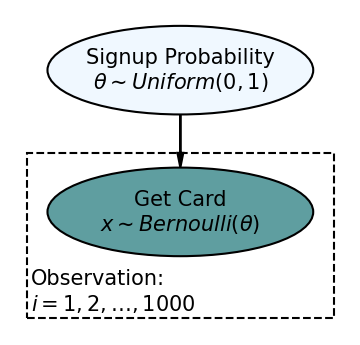

In [12]:
#@title Credit Card DAG - Use this for external stakeholders or yourself as needed
#| echo: false
#| include: false
#| results: hide
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial, partialmethod
import daft   ### %pip install -U git+https://github.com/daft-dev/daft.git
from numpy.random import default_rng
import numpy as np

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 1.6, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 5.4, fontsize = 9.25, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 1.6, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.25, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.obsNode("x","Get Card\n"+r"$x \sim Bernoulli(\theta)$",0,1, scale = 1.5, aspect = 3)
pgm.latNode("theta","Signup Probability\n"+r"$\theta \sim Uniform(0,1)$",0,2.2, scale = 1.5, aspect = 3)
pgm.add_edge("theta","x")
pgm.add_plate([-1.3, 0.1, 2.6, 1.4], label = "Observation:\n" + r"$i = 1, 2, \ldots, 1000$", 
              label_offset = (2,2), rect_params = dict({"fill": False, "linestyle": "dashed", "edgecolor": "black"}))
pgm.show(dpi = 150)

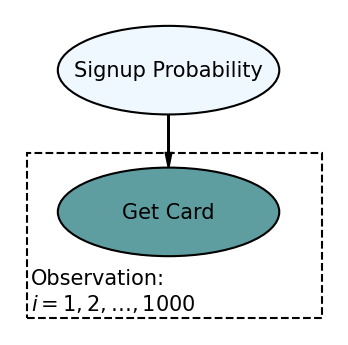

In [ ]:
#@title Credit Card DAG - Use this for non-technical external stakeholders
#| echo: false
#| include: false
#| results: hide
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial, partialmethod
import daft   ### %pip install -U git+https://github.com/daft-dev/daft.git
from numpy.random import default_rng
import numpy as np

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 1.6, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 5.4, fontsize = 9.25, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 1.6, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.25, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.obsNode("x","Get Card",0,1, scale = 1.5, aspect = 2.5)
pgm.latNode("theta","Signup Probability",0,2.2, scale = 1.5, aspect = 2.5)
pgm.add_edge("theta","x")
pgm.add_plate([-1.2, 0.1, 2.5, 1.4], label = "Observation:\n" + r"$i = 1, 2, \ldots, 1000$", 
              label_offset = (2,2), rect_params = dict({"fill": False, "linestyle": "dashed", "edgecolor": "black"}))
pgm.show(dpi = 150)

# Get Posterior

In [ ]:
# ## computationally get posterior distribution
numObs = len(getCardArray)
mcmc = MCMC(NUTS(carModel), num_warmup=1000, num_samples=4000) 
rng_key = random.PRNGKey(seed = 111) ## so you and I get same results
mcmc.run(rng_key, getCardArray, numObs) ## get representative sample of posterior
drawsDS = az.from_numpyro(mcmc).posterior ## get posterior samples into xarray
az.plot_posterior(drawsDS)

## adding car model information

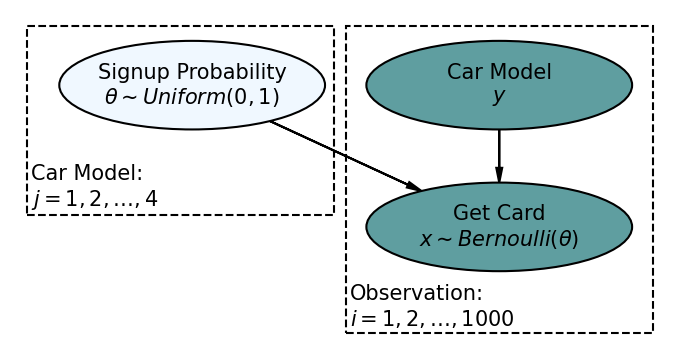

In [ ]:
#@title Credit Card DAG - Add Car Model
#| include: false
#| results: hide
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial, partialmethod
import daft   ### %pip install -U git+https://github.com/daft-dev/daft.git
from numpy.random import default_rng
import numpy as np

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 1.6, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 5.4, fontsize = 9.25, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 1.6, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.25, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.obsNode("x","Get Card\n"+r"$x \sim Bernoulli(\theta)$",0,1, scale = 1.5, aspect = 3)
pgm.obsNode("y","Car Model\n"+r"$y$",0,2.2, scale = 1.5, aspect = 3)
pgm.latNode("theta","Signup Probability\n"+r"$\theta \sim Uniform(0,1)$",-2.6,2.2, scale = 1.5, aspect = 3)
pgm.add_edge("theta","x")
pgm.add_edge("y","x")
pgm.add_plate([-1.3, 0.1, 2.6, 2.6], label = "Observation:\n" + r"$i = 1, 2, \ldots, 1000$", 
              label_offset = (2,2), rect_params = dict({"fill": False, "linestyle": "dashed", "edgecolor": "black"}))
pgm.add_plate([-4.0, 1.1, 2.6, 1.6], label = "Car Model:\n" + r"$j = 1, 2, \ldots, 4$", 
              label_offset = (2,2), rect_params = dict({"fill": False, "linestyle": "dashed", "edgecolor": "black"}))
pgm.show(dpi = 150)

## conforming to numpyro's requirement of using numeric arrays

In [ ]:
carModelDF.head(20)

In [ ]:
pd.factorize(carModelDF.head(20).carModel)

In [ ]:
## get car model index info into data
carModelDF["carID"] = pd.factorize(carModelDF.carModel)[0] # use [0] to get data array
carModelDF["carID"]

In [ ]:
## add plate for observations
def carModel2(carModelData, getCardData):
    with numpyro.plate("j", len(np.unique(carModelData))) as carID:
        theta = numpyro.sample('theta', dist.Uniform(low = 0, high = 1))
    with numpyro.plate("i", len(carModelData)):
        y = numpyro.deterministic("y", carModelData)
        x = numpyro.sample('x', dist.Bernoulli(probs = theta[carModelData]), obs = getCardData)

numpyro.render_model(carModel2, model_args = (carModelDF.carID.values, carModelDF.getCard.values), render_distributions = True)

In [ ]:
# ## computationally get posterior distribution
mcmc = MCMC(NUTS(carModel2), num_warmup=1000, num_samples=4000) 
rng_key = random.PRNGKey(seed = 111) ## so you and I get same results
mcmc.run(rng_key, carModelDF.carID.values, carModelDF.getCard.values) ## get representative sample of posterior
drawsDS = az.from_numpyro(mcmc,
                coords={"carModel": pd.factorize(carModelDF.carModel)[1]},
                dims={"theta": ["carModel"]}) ## get posterior samples into xarray


In [ ]:
az.plot_forest(drawsDS, var_names = "theta")
# drawsDS

# pd.factorize(carModelDF.carModel)[1]

### CLASS Question:  Why is the probability interval for the Toyota Corolla more narrow than the interval for the other cars?  Back up your theory with facts from the data.

In [ ]:
carModelDF.carModel.value_counts()

## How to Use Indicator Functions to Make Probabalistic Statements
what is the probability that `theta_KiaForte` > `theta_ToytCrll`?

In [ ]:
(
    drawsDS
    .posterior
    .assign(indicatorFlag = lambda DS: DS.theta.sel(carModel = 'Kia Forte') > DS.theta.sel(carModel = 'Toyota Corolla'))
    .indicatorFlag # isolate variable of interest
    .mean()
)

### CLASS EXERCISE:  Add to the below code to create an indicator function on the posterior draws to answer what is the probability that Subaru Outback drivers will signup probability for the card is at least 60% of the time? 

In [ ]:
(
    drawsDS
)